[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/probastat2020/blob/master/notebooks/programmation2.ipynb?hl=fr)

# Série de programmation 2


## Instructions générales

On va utiliser les librairies suivantes. __Évaluer la cellule ci-dessous__ pour importer toutes les librairies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy

Si une des librairies n'est pas installée, la cellule ci-dessus donne un `ModuleNotFoundError`. Dans ce cas vous pouvez les installer avec la ligne de commande :

    
```bash
    pip install <logiciel>
```

Si vous utilisez Google Colab ou vous venez d'installer Annaconda, toutes les librairies devraient être déja installées.

__Informations importants pour les exercises__  

* Les solutions des exercices ne font pas plus de quelques lignes. Réévaluer votre réponse si elle est beaucoup plus longue.  

* Redémarrer l'environment d'exécution (anglais : 'kernel') de temps en temps.  

* Tous les exercises ont des tests automatiques. Si vous évaluez les tests et ils ne donnent pas d'erreurs, votre réponse est probablement correcte.  

* Avant de remettre votre fichier, redémarrer l'environment d'exécution et exécuter toutes le code. Vérifier que aucun test ne donne une erreur.

## Partie 1: Marches aléatoires sur un réseau

Soit $\mathbb Z^n \subset \mathbb R^n$ le réseau d'entiers. Une marche aléatoire est une suite des variables aléatoires $\{V_t\}_{t\geq 0}$. On a $V_0 = (0,\dots,0)$, et $V_t = V_{t-1} + S_t$, où $S_t$ est un pas aléatoires de longueur $1$ dans une direction cardinale. 

C'est-à-dire, $S_t$ est uniforme à valeurs

$$
\begin{align}
&\{(+1,0,\dots,0),(-1,0,\dots,0),(0,+1,0,\dots,0),\dots,(0,\dots,+1),(0,\dots,-1)\}\\
&\cong \{1,\dots,n\}\times \{-1,1\}
\end{align}$$

Chaque étape de marche on choisit une direction $k$, et on ajoute $-1$ ou $+1$ à la $k$ième entrée de $V_t$. 

Si $n=1$, il n'y a pas besoin de choisir une direction parce qu'il n'y qu'une seule direction. On fait une simulation d'une marche aléatoire dans le cas $n=1$ ci-dessous:

In [2]:
def random_walk1d(N, t):
    """Simuler `N` marches aléatoires 1D de `t` étapes"""
    
    # Choisir (N × t) nombres uniforme en {0,1} et transformer à {-1,1}
    stepsize = (-1)**np.random.randint(0,2,size=(N,t))
    
    # Calculer la somme cumulative en direction de temps
    x = np.cumsum(stepsize, axis=1)
    
    return x

random_walk1d(3,10)

array([[-1,  0,  1,  0, -1,  0, -1, -2, -1,  0],
       [-1, -2, -3, -4, -5, -4, -3, -4, -3, -2],
       [ 1,  2,  1,  2,  1,  0,  1,  0,  1,  2]])

_____
> __Exercice 1a)__  
> Écrire une fonction `random_walk2d(N, t)` qui donne `N` simulations de `t` étapes d'une marche aléatoire. 
>
> Indications:
>
> - Définir une matrice `stepsize` comme ci-dessus  
> - Définir un matrice aléatoire `direction` à valeurs $\{0,1\}$  
> - Définir un matrice aléatoire dont les entrées sont `0` si `direction != 0`, et `stepsize` si `direction == 0`  
> - Définir `x` comme la somme cumulative de la matrice précédente (fait attention à l'axe).  
> - De même pour `y` avec `direction == 1`.  
>
> Une solution correcte et aussi une solution efficace. L'éxecution de ligne qui commence par `%time` faut renvoyer un temps pas beaucoup plus que 100ms sur du matériel moderne.

_____

CPU times: user 20.3 ms, sys: 3.35 ms, total: 23.7 ms
Wall time: 23 ms


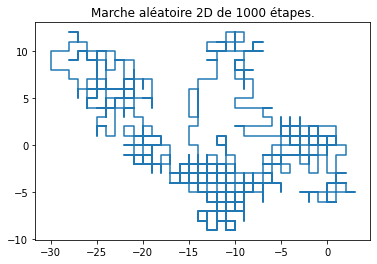

In [3]:
def random_walk2d(N, t):
    """Simuler `N` marches aléatoires 2D de `t` étapes"""
    
    ### BEGIN SOLUTION
    stepsize = (-1)**np.random.randint(0,2,size=(N,t))
    direction = np.random.randint(0,2,size=(N,t))
    x = np.cumsum(stepsize*direction, axis=1)
    y = np.cumsum(stepsize*(1-direction), axis=1)
    
    ### END SOLUTION
    
    return x,y

%time random_walk2d(100,10000)
x,y = random_walk2d(1,1000)
plt.plot(x.reshape(-1),y.reshape(-1))
plt.title('Marche aléatoire 2D de 1000 étapes.');

In [4]:
### tests AUTOMATIQUES

x,y = random_walk2d(20,30)
assert x.shape == (20,30), "Vérifier la taille du resultat"
assert y.shape == (20,30), "Vérifier la taille du resultat"
x,y = random_walk2d(10,10000)
assert x.shape == (10,10000), "Vérifier la taille du resultat"
assert y.shape == (10,10000), "Vérifier la taille du resultat"
assert type(x)==np.ndarray, "Le résultat n'est pas un numpy array"
assert type(y)==np.ndarray, "Le résultat n'est pas un numpy array"
assert abs(np.mean(np.diff(x)))<0.01, "Vérifier que vous faites un pas de grandeur -1,+1"
assert abs(np.mean(np.diff(y)))<0.01, "Vérifier que vous faites un pas de grandeur -1,+1"
assert np.max(np.abs(np.diff(x+y)))==1, "Vérifier que vous faites un pas de grandeur -1,+1"
assert np.min(np.abs(np.diff(x+y)))==1, "Vérifier que vous faites un pas de grandeur -1,+1"
assert abs(np.mean(np.abs(np.diff(x)))-0.5)<0.01, "Vérifier que vous faites un pas dans un seul direction chaque étape"
assert abs(np.mean(np.abs(np.diff(x+y)))-1)<0.01, "Vérifier que vous faites un pas dans un seul direction chaque étape"
assert set(x[:,0]+y[:,0]).issubset({-1,1}), "Vérifier la premier étape"

Pour une marche aléatoire dimension 2 la probabilité de retourner à $(0,0)$ pour un nombre d'étapes assez grand est égal à 1, mais cele peut prendre beaucoup de temps (ce n'est plus vrai en dimensions $\geq 3$). Nous estimerons la probabilité de retourner au moins une fois en temps fini $t$.

_____
> __Exercice 1b)__  
> Écrire une fonction `probability_return(N,t)` qui donne la proportion des `N` marches aléatoires 2D qui retournent au moins une fois à l'origine.
> 
> Le temps d'exécution de cellule ne pas être plus de quelques secondes sur du matériel moderne.

_____

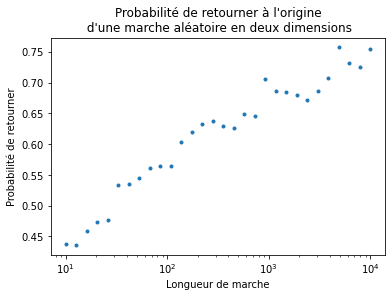

CPU times: user 1.41 s, sys: 226 ms, total: 1.63 s
Wall time: 1.63 s


In [5]:
%%time
def probability_return(N,t):
    """Calculer la proportion des `N` marches aléatoires de longueur `t` 
    qui retournent à l'origine.
    """
    
    x,y = random_walk2d(N,t)
    
    # BEGIN SOLUTION
    return np.mean(np.sum((x==0)&(y==0),axis=1)>0)
    # END SOLUTION

times = np.logspace(1,4,30)
return_fracs = [probability_return(1000,int(t)) for t in times]
plt.xscale('log')
plt.plot(times,return_fracs,'.')
plt.title('Probabilité de retourner à l\'origine\n d\'une marche aléatoire en deux dimensions')
plt.xlabel('Longueur de marche')
plt.ylabel('Probabilité de retourner')
plt.show()

In [6]:
### tests AUTOMATIQUES

assert 0<=probability_return(100,10)<=1, "Vérifier que la fonction renvoyer une probabilité"
assert 0<=probability_return(100,100)<=1, "Vérifier que la fonction renvoyer une probabilité"
assert probability_return(100,1)==0, "Vérifier votre solution"
assert abs(probability_return(10000,2)-0.25)<0.1, "Vérifier votre solution"
assert abs(probability_return(1000000,10)-0.4205)<0.1, "Vérifier votre solution"

## Partie 2: Mouvement brownien

Le mouvement brownien est une description mathématique du mouvement aléatoire des particules immergées dans un fluide (https://fr.wikipedia.org/wiki/Mouvement_brownien). Si $X_t$ est la position au temps $t$, l'hypothèse centrale est que

$$
    X_t-X_s \sim \mathcal N(0,t-s)
$$

Dans une seul dimension on peut donc simuler l'évolution de $X_t$ en $T$ étapes discrètes par postuler

$$
X_0 = 0,\qquad X_{n+1} = X_n + S_n,\qquad S\sim \mathcal N(0,s)
$$

où $s>0$ est une taille de pas. On a donc que $X_n$ est une somme cumulative des variables aléatoires normales.

Si on considère plusieurs dimensions, on a des variables $X_t^i$ indépendantes de même distribution.

_____
> __Exercice 2a)__  
> Écrire une fonction `brownian(N, T, stepsize=1.0)` qui fait `N` simulations de mouvement brownien 2D de `T` étapes avec un taille de pas `stepsize`.
>
> Le temps d'exécution de cellule ne doit pas être plus que quelques 100ms sur du matériel moderne.
>
> _Suggestion:_ Utiliser `np.cumsum` pour des sommes cumulatives et `np.random.normal` pour générer des nombres aléatoires à partir de la distribution normale.

_____

CPU times: user 52 ms, sys: 284 µs, total: 52.3 ms
Wall time: 51.4 ms


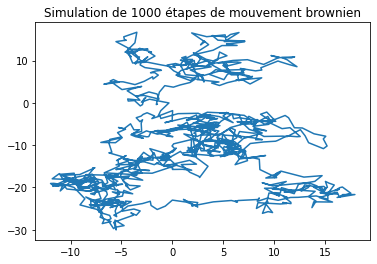

In [7]:
def brownian(N, T, stepsize=1.0):
    """Simuler `N` fois du mouvement brownien 2D de `t` étapes avec taille de pas `stepsize`"""
    
    # BEGIN SOLUTION
    x = np.cumsum(np.random.normal(scale=stepsize, size=(N,T)), axis=1)
    y = np.cumsum(np.random.normal(scale=stepsize, size=(N,T)), axis=1)
    # END SOLUTION
    
    return x,y

%time brownian(100,10000)
x,y = brownian(1, 1000, stepsize=1)
plt.plot(x.reshape(-1),y.reshape(-1))
plt.title('Simulation de 1000 étapes de mouvement brownien');

In [8]:
### tests AUTOMATIQUES
x,y = brownian(100, 10000, stepsize=.3)
assert type(x)==np.ndarray, "Le résultat n'est pas un numpy array"
assert type(y)==np.ndarray, "Le résultat n'est pas un numpy array"
assert x.shape == (100,10000), "Vérifier la taille de resultat"
assert y.shape == (100,10000), "Vérifier la taille de resultat"
assert abs(np.mean(np.abs(np.diff(x)**2))/0.3**2-1)<0.01, "Vérifier la taille de pas"
assert abs(np.std(np.diff(x))/0.3)-1<0.01, "Vérifier que les pas suivent un loi normale"

x,y = brownian(200, 30000, stepsize=1)
assert x.shape == (200,30000), "Vérifier la taille de resultat"
assert y.shape == (200,30000), "Vérifier la taille de resultat"
assert abs(np.mean(np.abs(np.diff(x)**2))-1)<0.01, "Vérifier la taille de pas"
assert abs(np.mean(np.diff(x)-np.diff(y)))<0.01, "Vérifier que les pas suivent un loi normale"
assert abs(np.std(np.diff(x))-1)<0.01, "Vérifier que les pas suivent un loi normale"

assert type(x)==np.ndarray, "Le résultat n'est pas un numpy array"
assert type(y)==np.ndarray, "Le résultat n'est pas un numpy array"
assert abs(np.mean(x[:,0]))<0.3, "Vérifier la première étape"
assert abs(np.mean(y[:,0]))<0.3, "Vérifier la première étape"

Comme la marche aléatoire sur $\mathbb Z^2$, le mouvement brownien en deux dimensions retourne à la longue arbitrairement proche de l'origine. Si $(X_t,Y_t)$ est la position de mouvement brownien au temps $t$, la distance de l'origine est $D_t = \sqrt{X_t^2+Y_t^2}$. On va étudier comme la variable aléatoire $D_t$ évolue.

_____
> __Exercice 2b)__  
> - Faire `10000` simulations de `100` étapes de mouvement brownien (à taille de pas unitaire).  
> - Calculer la distance de l'origine $D=\sqrt{x^2+y^2}$ pour chaque simulation et pour chaque étape.  
> - Estimer l'espérance de distance en fonction du temps, et stocker le résultat dans une variable `moyens`. (Faites attention à l'axe)  
> - Estimer l'écart-type de distance en fonction du temps, et stocker le résultat dans une variable `ecart_types`. (Faites attention à l'axe, et utiliser `np.std`)  

_____

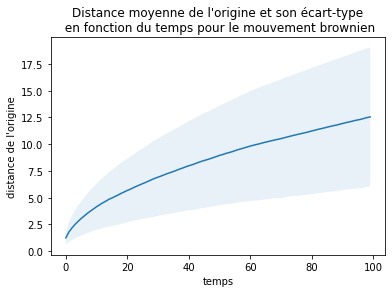

In [9]:
# BEGIN SOLUTION
N = 10000
T = 100
x,y = brownian(N, T)
D = np.sqrt(x**2+y**2)
moyens = np.mean(D,axis=0)
ecart_types = np.std(D,axis=0)
# END SOLUTION

time = np.arange(100)
plt.plot(moyens)
plt.fill_between(time, y1=moyens-ecart_types,y2=moyens+ecart_types,alpha=0.1)
plt.title('Distance moyenne de l\'origine et son écart-type\n en fonction du temps pour le mouvement brownien')
plt.xlabel('temps')
plt.ylabel('distance de l\'origine');

In [10]:
### tests AUTOMATIQUES

assert type(moyens)==np.ndarray, "Le resultat n'est pas un numpy array"
assert type(ecart_types)==np.ndarray, "Le resultat n'est pas un numpy array"
assert moyens.shape == (100,), "Vérifier la taille de solution"
assert ecart_types.shape== (100,), "Vérifier la taille de solution"
assert abs(np.mean(moyens**2)-80)<3, "Vérifier votre solution"
assert abs(moyens[0]-1.25)<0.1, "Vérifier votre solution"
assert abs(np.mean(ecart_types)-4.39)<0.2, "Vérifier votre solution"
assert abs(np.std(ecart_types)-1.52)<0.2, "Vérifier votre solution"

## Partie 3: Marches aléatoires comme modèle de langage naturel

On peut aussi modeler du langage naturel avec des marches aléatoires. 

Le langage naturel consiste des suites $\{X_k\}_{k}$ de caractères. On peut modeler la probabilité de $X_k$ sachant les caractères precédents. Pour avoir une modèle assez simple, on peut supposer que $X_k$ dépend seulement de $n$-caractères precédents (le $n$-gramme precédent):

$$
P(X_k | X_{k-1},X_{n-2},\dots,X_1) = P(X_k | X_{k-1},X_{k-2},\dots,X_{k-n})
$$

(Avec cette hypothèse on dit que $\{X_k\}_{k}$ est une chaîne de Markov). On peut obtenir un modèle comme ça en analysant des textes. Dans cette série on va analyser [les poésies complètes d'Arthur Rimbaud](http://www.gutenberg.org/ebooks/29302). D'abord on va télécharger le texte et faire un prétraitement __(évaluer la cellule ci-dessous)__

In [11]:
import urllib.request
from urllib.error import URLError
try:
    # Si la fichier est déja téléchargé, ouvrir directement
    with open('rimbaud.txt',encoding='utf8') as f:
        edited_text = f.read()
except FileNotFoundError:
    try:
        with urllib.request.urlopen('http://www.gutenberg.org/cache/epub/29302/pg29302.txt') as f:
            text = f.read().decode('utf-8')
            # Prétraitement de texte. Nous voulons seulement les lignes de texte avec de la poésie.
            edited_text = ''
            for line in text.split('\n'):
                if line[:4]=='    ': # on voit que seulement ces lignes sont de la poésie
                    line_edited = line.lower() # seulement lettres minuscules
                    line_edited= ' '.join(line_edited.split()) # supprimer les espaces non-utilisés
                    line_edited = ''.join([c for c in line_edited if c not in ['_','-']])

                    if line_edited == 'préface': # tout le texte suivant `préface' n'est pas intéressant
                        break
                    if line_edited[:4]!='. . ': # quelques lignes composées seulement de points
                        edited_text += line_edited+'\n' # écrire des lignes bonnes dans un variable
            with open('rimbaud.txt','w',encoding='utf8') as f:
                f.write(edited_text)
    except URLError:
        print('Erreur de téléchargement! Télécharger manuellement.')

Pour modeler les probabilités, on définit

$$
P(X_k | X_{k-1},X_{k-2},\dots,X_{k-n}) = \frac{\#\{X_{k-n}X_{k-n+1}\dots X_{k}\}}{\#\{X_{k-n}X_{k-n+1}\dots X_{k-1}\}}
$$

c'est-à-dire, on compte le nombre des occurences de $n$-gramme $X_{k-n}\dots X_{k-1}X_{k}$ et on divise par le nombre des occurences de $n-1$-gramme $X_{k-n}\dots X_{k-1}$. 

On peut efficacement obtenir les nombres des occurences des $n$-grammes dans un texte en utilisant [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). (`sklearn` est une librairie de machine learning omniprésente). On va utiliser $n=5$ dans cette série, mais $n=4$ ou $6$ donne des résultats similaires.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

n = 5

# `analyzer='char'` dit qu'on veut des ngrammes, pas de mots
# `ngram_range=(n,n)` dit qu'on veut de n-grammes (c-à-d. caractères individuels)
# `strip_accents='unicode'` dit que on supprime les accents (p. ex. é -> e).
vectorizer = CountVectorizer(analyzer='char', ngram_range=(n,n), strip_accents='unicode')

# Vecteur avec nombres d'occurences de toutes les n-grammes
ngram_counts = vectorizer.fit_transform([edited_text]).toarray().reshape(-1)

# Liste triée de tous les n-grammes
ngrams = vectorizer.get_feature_names()

# Liste de tous les caractères différentes dans le texte
all_chars = ''.join(sorted((set(''.join(vectorizer.get_feature_names())))))
all_chars = list(all_chars)

# Dictionnaire qui donne une indice pour chaque caractère
char_map = {c:i for i,c in enumerate(all_chars)}

# Nombre total des caractères
num_chars = len(all_chars)

_____
> __Exercice 3a)__  
> Créer un dictionnaire `ngram_map` qui donne pour chaque $(n-1)$-gramme une liste des indices de tous les $n$-grammes qui commencent avec cette $(n-1)$-gramme.  
> _Suggestion:_ Utiliser une boucle et la variable `ngrams`

_____

On utilise une `defaultdict` pour `ngram_map`. Une `defaultdict` fonctionne de la même façon q'un dictionnaire ordinaire, mais si un clé n'est pas dans la `defaultdict`, il retourne un objet standard (dans ce cas une liste). Comme ça on n'a pas besoin de vérifier si une clé existe avant utiliser le dictionnaire.

In [13]:
from collections import defaultdict

ngram_map = defaultdict(list)

# BEGIN SOLUTION
for i,ngram in enumerate(ngrams):
    ngram_map[ngram[:-1]].append(i)
# END SOLUTION

In [14]:
### tests AUTOMATIQUES
assert type(ngram_map) == defaultdict, "Vérifier que `ngram_map` est une `defaultdict`"
assert 'vous' in ngram_map, "Vérifier que toutes les (n-1)grammes sont dans le dictionnaire"
assert ngram_map['vous'] == [26980, 26981, 26982, 26983], "Vérifier que toutes les n-grammes sont indexé"
assert len(ngram_map) >= 13267, "Vérifier que les cles sont (n-1)grammes"
assert set(len(k) for k in ngram_map.keys()) == {4}, "Vérifier que les cles sont (n-1)grammes"
assert len([k for l in ngram_map.values() for k in l])==len(ngrams), "Vérifier que toutes les n-grammes sont indexé"

_____
> __Exercice 3b)__  
> Écrire une fonction `probabilites_ngram(ngram)` qui, sachant une $n$-gramme `ngram`, donne un vecteur des probabilités des caractères qui peuvent suivre cette $n$-gramme. On ajoute $10^{-6}$ à tous les comptes pour régulariser.
> 
> _Indications:_  
> - Utiliser la variable `ngram_map` de 3a) pour trouver les indices des $n$-grammes pertinentes  
> - Pour chaque indice `i`:  
>    - trouver la $n$-gramme `ngram` associée avec `ngrams[i]`  
>    - trouver l'indice `j` de dernière caractère de `ngram` en utilisant `char_map`  
>    - Ajouter à `counts[j]` le nombre d'occurence de la `i`ème $n$-gramme (utiliser `ngram_counts`)  
> - Normaliser `counts` pour que la somme soit 1.  
> - Renvoyer le résultat  

_____

In [15]:
def probabilites_ngram(ngram):
    counts = np.ones(num_chars)/1e6
    
    # BEGIN SOLUTION
    indices = ngram_map[ngram]
    
    for i in indices:
        char = ngrams[i][-1]
        j = char_map[char]
        counts[j]+=ngram_counts[i]
    probs = counts/np.sum(counts)
    
    return probs
    # END SOLUTION

In [16]:
### tests AUTOMATIQUES
v = probabilites_ngram('asdf')
assert np.sum(v)==1.0, "Vérifier que les probabilités sont bien normalisées"
assert set(v)=={0.025}, "Vérifier que vous utilisez la régularisation"
assert len(v) == num_chars, "Vérifier la taille du résultat"
assert type(v) == np.ndarray, "Le résultat n'est pas un numpy array"

v = probabilites_ngram('amou')
assert np.sum(v)==1.0, "Vérifier que les probabilités sont bien normalisées"
assert 0<1-np.max(v) < 1e-6, "Vérifier que vous utilise la régularisation, et que vous comptez les n-grammes correctement"

v = probabilites_ngram('vous')
assert np.sum(v)==1.0, "Vérifier que les probabilités sont bien normalisées"
assert abs(0.825 - np.max(v)) < 1e-6, "Vérifier que vous utilise la régularisation, et que vous comptez les ngrammes correctement"

_____
> __Exercice 3c)__  
> Écrire une fonction `simuler_rimbaud(n_chars, start_text)` qui génère un texte au hasard, commençant par `start_text` et par ajouter `n_chars` caractères. 
>  
>  
> _Indications:_  
> Pour chaque itération:  
> - Calculer la probabilités de la caràctere suivante en utilisant `probabilites_ngram`  
> - Tirer au hasard un caractère parmi `all_chars` avec `np.random.choice` (n'oubliez pas de spécifier les probabilités).  
> - Ajouter la caractère à la texte  
> - Mise à jour la $n$-gramme `ngram`.    
> 
> Si votre solution est correcte, vous verrez du texte (assez) compréhensible au niveau des mots  

_____

In [17]:
def simuler_rimbaud(n_chars, start_text):
    ngram = start_text[-n+1:]
    text = start_text
    for _ in range(n_chars):
        # BEGIN SOLUTION
        probs = probabilites_ngram(ngram)
        next_char = np.random.choice(all_chars, p=probs)
        
        ngram = ngram[1:]+next_char
        text+=next_char
        # END SOLUTION
    print(text)
    
simuler_rimbaud(1000, "l'amour")

l'amours!
chauds.
et toute ma qu'il s'en se des omoplates;
puis iles
de collant pour de quelques
de ses superbes son triste un claironts piere rougeoyant leve par ma terre,
aux de qui grand ils sur les pied d'une faut, de ce que choses!
tres heureuillent entredames;
et, le tempereur,
qui murmureron.
puisant la. c'est endormes de la femme,
croupeau sein des blancs vernis enorment au roissel, il penche verts ont betes fleur des chaste,
je veux mots astres avez plus. je vers me restais l'arbre, etait calices comme une fient, noir!
entement!
nous damoisine tristesses,
un fini ces penche...
le bande mere a l'herbe d'un chiffons,
tres houlement les tout, je sous les serais
comme je sure sont leur de chaisers, sabots, emer du sillotee
de viendre et ma que cet est la chettes dite,
la gras laids!
tandit qu'on aux seins.
l'homme de christ, o l'enfant plong
dans s'echistoi! je vais les et le coule,
montre merde dieux...
c'est penetre et le front baisait sa patient l'air, dans un sille. il a levre